In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import plotly.express as px
%matplotlib inline

## Embarcações mais importantes no Brasil. Fonte: Marinha do Brasil ##

In [68]:
marinha = pd.read_csv("total_tipo_emb_2020.csv",encoding='ISO-8859-1', on_bad_lines='skip', sep=';')
marinha

,DN,OM,SIGLA OM,UF,TIPO DE EMBARCAÇÃO,TOTAL DE EMBARCAÇÕES POR TIPO
0,1º,Agência da Capitania dos Portos em Paraty,AGPRTI,RJ,Balsa,11
1,1º,Agência da Capitania dos Portos em Paraty,AGPRTI,RJ,Barcaça,4
2,1º,Agência da Capitania dos Portos em Paraty,AGPRTI,RJ,Bote,2086
3,1º,Agência da Capitania dos Portos em Paraty,AGPRTI,RJ,Canoa,312
4,1º,Agência da Capitania dos Portos em Paraty,AGPRTI,RJ,Chata,4
...,...,...,...,...,...,...
1871,9º,Capitania Fluvial de Tabatinga,CFT,AM,Passageiro,16
1872,9º,Capitania Fluvial de Tabatinga,CFT,AM,Passageiro / Carga Geral,18
1873,9º,Capitania Fluvial de Tabatinga,CFT,AM,Pesqueiro,25
1874,9º,Capitania Fluvial de Tabatinga,CFT,AM,Rebocador,60


In [69]:
marinha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DN                             1876 non-null   object
 1   OM                             1876 non-null   object
 2   SIGLA OM                       1876 non-null   object
 3   UF                             1876 non-null   object
 4   TIPO DE EMBARCAÇÃO             1876 non-null   object
 5   TOTAL DE EMBARCAÇÕES POR TIPO  1876 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 88.1+ KB


# Removendo COLUNAS que não são interessantes para a análise de dados #

In [70]:
d=['OM', 'SIGLA OM', 'DN']

In [71]:
data=marinha.drop(columns=d)
data

,UF,TIPO DE EMBARCAÇÃO,TOTAL DE EMBARCAÇÕES POR TIPO
0,RJ,Balsa,11
1,RJ,Barcaça,4
2,RJ,Bote,2086
3,RJ,Canoa,312
4,RJ,Chata,4
...,...,...,...
1871,AM,Passageiro,16
1872,AM,Passageiro / Carga Geral,18
1873,AM,Pesqueiro,25
1874,AM,Rebocador,60


In [72]:
print(data['TIPO DE EMBARCAÇÃO'].value_counts(ascending=False))

Lancha                                  68
Canoa                                   68
Bote                                    67
Moto-Aquática/similar                   67
Balsa                                   66
                                        ..
Transporte Escolar                       2
Quebra-gelo                              2
Estimulador de Poço                      1
Carga de Alta Velocidade (HSC Carga)     1
Cisterna (FSU)                           1
Name: TIPO DE EMBARCAÇÃO, Length: 68, dtype: int64


## AGRUPANDO A COLUNA TIPO DE EMBARCAÇÃO EM OUTROS ## 

In [73]:
embarcacao=data['TIPO DE EMBARCAÇÃO'].value_counts()

colunas_agrupar = []

for tipo_embarcacao in embarcacao.index:
        if embarcacao[tipo_embarcacao] < 30:
            colunas_agrupar.append(tipo_embarcacao)
print(colunas_agrupar)

for tipo_embarcacao in colunas_agrupar:
    data.loc[data['TIPO DE EMBARCAÇÃO']==tipo_embarcacao, 'TIPO DE EMBARCAÇÃO'] = 'Outras_embarcações'

print(data['TIPO DE EMBARCAÇÃO'].value_counts())

['Pesquisa', 'Caique', 'Lançador de Linhas', 'Roll-on / Roll-off Passageiro (Ferry Boat)', 'Cábrea', 'Tanque (transporte de granéis líquidos)', 'Graneleiro', 'Petroleiro', 'Laser', 'Alvarenga', 'Apoio a Mergulho', 'Supridor (Supply)', 'Dique Flutuante', 'Plataforma Fixa', 'Apoio à Manobra', 'Transporte de Gases Liquefeitos', 'Manuseio de Âncora (AHTS)', 'Petroleiro e Químico', 'Porta-Contentor', 'Plataforma Auto-Elevável', 'Roll-on / Roll-off Carga ', 'Oceonagráfico', 'Anfíbia', 'Químico', 'Flotel', 'Floating, Production, Storage and Off-Loading Unit (FPSO)', 'Apoio a ROV', 'Transporte de Carga Pesada (Navio de Cargas Especiais)', 'Passageiro de Alta Velocidade (HSC Passageiro)', 'Multipurpose', 'Plataforma Semi-Submersível', 'Curral', 'Hidroavião', 'Manuseio de Linhas', 'Químico e Gaseiro', 'Sonda', 'Transporte Escolar', 'Quebra-gelo', 'Estimulador de Poço', 'Carga de Alta Velocidade (HSC Carga)', 'Cisterna (FSU)']
Outras_embarcações                                449
Canoa           

#### Removendo embarcações não comercializáveis em larga escala e/ou que foram agrupados anteriormente ####

In [74]:
df_remove = data.loc[(data['TIPO DE EMBARCAÇÃO']=='Outros')| (data['TIPO DE EMBARCAÇÃO']=='Hovercraft') | (data['TIPO DE EMBARCAÇÃO']=='Traineira') | (data['TIPO DE EMBARCAÇÃO']=='Passageiro / Carga Geral') | (data['TIPO DE EMBARCAÇÃO']=='Empurrador') 
                     | (data['TIPO DE EMBARCAÇÃO']=='Outras_embarcações') | (data['TIPO DE EMBARCAÇÃO']=='Carga Geral') | (data['TIPO DE EMBARCAÇÃO']=='Draga') | (data['TIPO DE EMBARCAÇÃO']=='Saveiro')
                     | (data['TIPO DE EMBARCAÇÃO']=='Chata') | (data['TIPO DE EMBARCAÇÃO']=='Multicasco (Catamarã, Trimarã, Tetramarã, etc)') | (data['TIPO DE EMBARCAÇÃO']=='Pesqueiro') | (data['TIPO DE EMBARCAÇÃO']=='Barcaça') 
                     | (data['TIPO DE EMBARCAÇÃO']=='Balsa') | (data['TIPO DE EMBARCAÇÃO']=='Rebocador') | (data['TIPO DE EMBARCAÇÃO']=='Batelão') | (data['TIPO DE EMBARCAÇÃO']=='Flutuante')
                     | (data['TIPO DE EMBARCAÇÃO']=='Passageiro') | (data['TIPO DE EMBARCAÇÃO']=='Caiaque') | (data['TIPO DE EMBARCAÇÃO']=='Canoa') | (data['TIPO DE EMBARCAÇÃO']=='Escuna') | (data['TIPO DE EMBARCAÇÃO']=='Jangada') | (data['TIPO DE EMBARCAÇÃO']=='Bote')]
embarcacao_alterado = data.drop(df_remove.index)
embarcacao_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 9 to 1869
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   UF                             283 non-null    object
 1   TIPO DE EMBARCAÇÃO             283 non-null    object
 2   TOTAL DE EMBARCAÇÕES POR TIPO  283 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.8+ KB


C:\Users\ferna.DESKTOP-GFV23K6\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TIPO DE EMBARCAÇÃO', ylabel='count'>

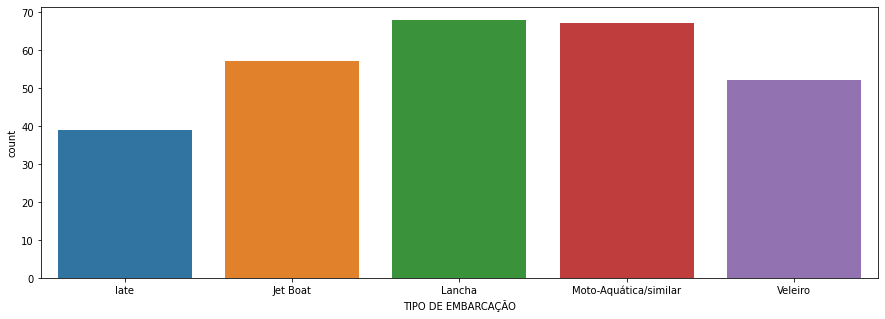

In [75]:
plt.figure(figsize=(15,5))
sns.countplot('TIPO DE EMBARCAÇÃO', data=embarcacao_alterado)

- Pelo gráfico nota-se que os dois maiores registros de embarcações são: lancha e moto-aquática (jet ski).

### Salvando a tabela na pasta local ###

In [76]:
writer = pd.ExcelWriter(r'D:\embarcacao_alterado.xlsx')
embarcacao_alterado.to_excel(writer,'DADOS', index=False)
writer.save()

#### Visualizar a tabela dinâmica ####

In [77]:
table=embarcacao_alterado.pivot_table(index=['TIPO DE EMBARCAÇÃO','UF'], values=['TOTAL DE EMBARCAÇÕES POR TIPO'], aggfunc='sum', margins=True)


In [78]:
table

TOTAL DE EMBARCAÇÕES POR TIPO
TIPO DE EMBARCAÇÃO UF                               
Iate               AL                              4
                   AM                             68
                   AP                             32
                   BA                             93
                   CE                             16
...                                              ...
Veleiro            SC                           1314
                   SE                             33
                   SP                           3911
                   TO                              7
All                                           361607

[121 rows x 1 columns]